## Assignment1-ML-for-NLP2
For this assignment, you will work in groups. (See group assignment below.) 
Use the samples of Twitter data posted in the Input folder (corresponding to NYT and Fox News) and do the following:


1. Data cleaning. 

Remove stopwords, links, hashtags, etc. 

2. Feature engineering.

Create popularity and engagement measures, mentions (i.e. a tweet includes @), popular hashtags, breaking news, growth of followers, an indicator if the tweet is posted by NYT, and zero if the tweet belongs to Fox News.

3. Data Exploration and Prediction
- Is there a follower-tweet relationship? 
- What are the most frequent topics tweeted about by each outlet? Are there differences in outlets?
- Is there a relationship between the sentiment of the tweet and the outlet?
- Can we predict the outlet by the text of the tweet? Use classification methods (Naive Bayes, Logistic Regression, Support Vector Classifier using Count Vectorizer, Tf-Idf, or Word Embeddings). Which method performs better? Why?
- Do the usual word analogies hold in this sample?
- Create the most representative tweet by outlet (See  https://www.youtube.com/watch?v=zFScws0mb7M&t=23m03s and the Q&A for his description of it is implemented in the algorithm.)

Bonus 10 points: Create at least two own explorations.

Create a GitHub repository with your code and invite me to it. 


In [1]:
import numpy as np
from numpy import array
import pandas as pd
df = pd.read_csv('./Inputs/FoxNews_all_tweets.csv')
df

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count,tweet_id,reference_status
0,1367531,FoxNews,20946694,456439,NaN,NaN,FLASHBACK: Ex-intel officials claimed the Hunt...,2022-03-18 15:50:00+00:00,26,39,68,0,1504847596006821894,NaN
1,1367531,FoxNews,20946694,456439,NaN,NaN,Biden must do more to counter Putin's propagan...,2022-03-18 15:45:00+00:00,23,94,92,7,1504846338097221635,NaN
2,1367531,FoxNews,20946694,456439,NaN,NaN,NASCAR: What to expect from Atlanta's super ne...,2022-03-18 15:40:00+00:00,10,9,21,0,1504845079344820224,NaN
3,1367531,FoxNews,20946694,456439,NaN,NaN,"BREAKING: Biden, Xi discuss Russia's war again...",2022-03-18 15:34:43+00:00,33,71,87,3,1504843752426323990,NaN
4,1367531,FoxNews,20946694,456439,NaN,NaN,Transgender swimmer's NCAA championship win 'j...,2022-03-18 15:30:00+00:00,51,69,254,4,1504842564117024770,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,1367531,FoxNews,20946696,456439,NaN,NaN,Social media explodes following Jussie Smollet...,2022-03-11 16:45:00+00:00,20,66,94,5,1502324722264166402,NaN
1325,1367531,FoxNews,20946696,456439,NaN,NaN,Congress gets up close view of 'horrific' Russ...,2022-03-11 16:35:00+00:00,35,72,117,2,1502322205597712385,NaN
1326,1367531,FoxNews,20946696,456439,NaN,NaN,GOP lawmaker slams Biden's blame game on sky-h...,2022-03-11 16:25:00+00:00,59,160,263,6,1502319689137012740,NaN
1327,1367531,FoxNews,20946696,456439,NaN,NaN,Prince William’s comment about ‘alien’ Ukraine...,2022-03-11 16:15:00+00:00,15,38,53,6,1502317172722323456,NaN


In [2]:
df.head(100)

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count,tweet_id,reference_status
0,1367531,FoxNews,20946694,456439,NaN,NaN,FLASHBACK: Ex-intel officials claimed the Hunt...,2022-03-18 15:50:00+00:00,26,39,68,0,1504847596006821894,NaN
1,1367531,FoxNews,20946694,456439,NaN,NaN,Biden must do more to counter Putin's propagan...,2022-03-18 15:45:00+00:00,23,94,92,7,1504846338097221635,NaN
2,1367531,FoxNews,20946694,456439,NaN,NaN,NASCAR: What to expect from Atlanta's super ne...,2022-03-18 15:40:00+00:00,10,9,21,0,1504845079344820224,NaN
3,1367531,FoxNews,20946694,456439,NaN,NaN,"BREAKING: Biden, Xi discuss Russia's war again...",2022-03-18 15:34:43+00:00,33,71,87,3,1504843752426323990,NaN
4,1367531,FoxNews,20946694,456439,NaN,NaN,Transgender swimmer's NCAA championship win 'j...,2022-03-18 15:30:00+00:00,51,69,254,4,1504842564117024770,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1367531,FoxNews,20946694,456439,NaN,NaN,‘I NEED A GUINNESS’: The House speaker introdu...,2022-03-18 01:42:00+00:00,49,109,134,20,1504634189655810048,NaN
96,1367531,FoxNews,20946694,456439,NaN,NaN,Florida driver plows through preschool playgro...,2022-03-18 01:40:00+00:00,42,71,53,4,1504633686410547204,NaN
97,1367531,FoxNews,20946694,456439,NaN,NaN,Justin Bieber addresses Hailey Baldwin’s 'real...,2022-03-18 01:35:00+00:00,16,22,67,2,1504632428198957056,NaN
98,1367531,FoxNews,20946694,456439,NaN,NaN,Buck Sexton blasts Big Tech after New York Tim...,2022-03-18 01:30:00+00:00,83,73,340,3,1504631172298645504,NaN


In [3]:
df.describe()

,author_id,author_followers,author_tweets,author_description,author_location,retweets,replies,likes,quote_count,tweet_id,reference_status
count,1329.0,1.329000e+03,1329.0,0.0,0.0,1329.000000,1329.000000,1329.000000,1329.000000,1.329000e+03,0.0
mean,1367531.0,2.094670e+07,456439.0,NaN,NaN,80.906697,149.758465,393.826185,14.866065,1.503591e+18,NaN
std,0.0,1.179504e+00,0.0,NaN,NaN,196.496747,296.394579,1145.066943,31.816612,7.412145e+14,NaN
min,1367531.0,2.094669e+07,456439.0,NaN,NaN,4.000000,4.000000,21.000000,0.000000,1.502315e+18,NaN
25%,1367531.0,2.094669e+07,456439.0,NaN,NaN,23.000000,33.000000,77.000000,3.000000,1.502965e+18,NaN
50%,1367531.0,2.094670e+07,456439.0,NaN,NaN,38.000000,65.000000,138.000000,6.000000,1.503676e+18,NaN
75%,1367531.0,2.094670e+07,456439.0,NaN,NaN,68.000000,140.000000,280.000000,13.000000,1.504216e+18,NaN
max,1367531.0,2.094670e+07,456439.0,NaN,NaN,4266.000000,3851.000000,22508.000000,470.000000,1.504848e+18,NaN


In [4]:
df2 = pd.read_csv('./Inputs/nytimes_all_tweets.csv')
df2

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count,tweet_id,reference_status
0,807095,nytimes,52297192,466267,NaN,NaN,Hong Kong said that more than one million peop...,2022-03-18 15:45:19+00:00,83,30,160,16,1504846417063460916,NaN
1,807095,nytimes,52297192,466267,NaN,NaN,The pandemic is not yet over. But New York’s e...,2022-03-18 15:30:10+00:00,43,27,142,5,1504842606269841455,NaN
2,807095,nytimes,52297192,466267,NaN,NaN,"Alexander Chekmenev, a Ukrainian photographer,...",2022-03-18 15:20:04+00:00,76,13,303,4,1504840063397646336,NaN
3,807095,nytimes,52297192,466267,NaN,NaN,"The format of “American Song Contest,” hosted ...",2022-03-18 15:15:03+00:00,29,9,133,7,1504838803097272351,NaN
4,807095,nytimes,52297192,466267,NaN,NaN,"China’s top leader, Xi Jinping, told President...",2022-03-18 15:12:04+00:00,75,52,268,10,1504838050479751209,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,807095,nytimes,52297191,466267,NaN,NaN,"Kyrylo Lysov, 22, and his girlfriend Yelyzavet...",2022-03-11 16:40:18+00:00,737,170,5277,54,1502323539197706243,NaN
619,807095,nytimes,52297191,466267,NaN,NaN,Our journalists are looking into how companies...,2022-03-11 16:30:12+00:00,32,38,150,7,1502320998636527619,NaN
620,807095,nytimes,52297191,466267,NaN,NaN,Breaking News: Alec Baldwin gave his most deta...,2022-03-11 16:18:19+00:00,59,81,227,20,1502318008844406786,NaN
621,807095,nytimes,52297191,466267,NaN,NaN,A shipwreck from 1891 has been discovered in L...,2022-03-11 16:10:04+00:00,88,15,361,16,1502315929941815305,NaN


In [5]:
#ABAy's code

# List of all hashtags

In [6]:
def return_all_hashtags(tweets):
    all_hashtags=[]
    for tweet in tweets:
        for word in tweet.split():
            if word.startswith('#'):
                all_hashtags.append(word)
    return all_hashtags

In [7]:
hashtag_list = return_all_hashtags(df2['text'])

In [8]:
hashtag_list = return_all_hashtags(df2['text'])

In [9]:
import re

In [10]:
def preprocessing_text(text):
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text) #remove all non‐alphanumeric characters except white space
    words = text
    return words

In [11]:
for i in range(len(hashtag_list)):
    hashtag_list[i] = preprocessing_text(hashtag_list[i])

In [12]:
hashtag_list

['MeToo',
 'CriticsChoiceAwards',
 'CriticsChoiceAwards',
 'CriticsChoiceAwards',
 'CriticsChoice',
 'CriticsChoice',
 'CriticsChoice',
 'CriticsChoice',
 'CriticsChoice']

In [13]:
hashtag_set = set(hashtag_list)
hashtag_list = list(hashtag_set)
hashtag_list

['MeToo', 'CriticsChoiceAwards', 'CriticsChoice']

In [14]:
for element in hashtag_list:
    #df2['hashtag_'+element] = np.where(('#'+element) in df2.text, 1,0)
    df2['hashtag_'+element] = df2.apply(lambda x: 1 if element in x.text else 0, axis = 1)

In [15]:
for element in hashtag_list:
    #df2['hashtag_'+element] = np.where(('#'+element) in df2.text, 1,0)
    df2['hashtag1_'+element] = df2['text'].apply(lambda x: 1 if len(re.findall(element, x))>0 else 0)

In [16]:
df2['C'] = df2.apply(lambda x: 'metoo' in x.text, axis=1).astype(int)

In [17]:
text = '#criticschoiceawards kscliwec'
for element in hashtag_list:
    if element in text:
        print()


In [18]:
df2.text.apply(lambda x: 1 if len(re.findall(element, x))>0 else 0)

0      0
1      0
2      0
3      0
4      0
      ..
618    0
619    0
620    0
621    0
622    0
Name: text, Length: 623, dtype: int64

In [19]:
df2

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,...,quote_count,tweet_id,reference_status,hashtag_MeToo,hashtag_CriticsChoiceAwards,hashtag_CriticsChoice,hashtag1_MeToo,hashtag1_CriticsChoiceAwards,hashtag1_CriticsChoice,C
0,807095,nytimes,52297192,466267,NaN,NaN,Hong Kong said that more than one million peop...,2022-03-18 15:45:19+00:00,83,30,...,16,1504846417063460916,NaN,0,0,0,0,0,0,0
1,807095,nytimes,52297192,466267,NaN,NaN,The pandemic is not yet over. But New York’s e...,2022-03-18 15:30:10+00:00,43,27,...,5,1504842606269841455,NaN,0,0,0,0,0,0,0
2,807095,nytimes,52297192,466267,NaN,NaN,"Alexander Chekmenev, a Ukrainian photographer,...",2022-03-18 15:20:04+00:00,76,13,...,4,1504840063397646336,NaN,0,0,0,0,0,0,0
3,807095,nytimes,52297192,466267,NaN,NaN,"The format of “American Song Contest,” hosted ...",2022-03-18 15:15:03+00:00,29,9,...,7,1504838803097272351,NaN,0,0,0,0,0,0,0
4,807095,nytimes,52297192,466267,NaN,NaN,"China’s top leader, Xi Jinping, told President...",2022-03-18 15:12:04+00:00,75,52,...,10,1504838050479751209,NaN,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,807095,nytimes,52297191,466267,NaN,NaN,"Kyrylo Lysov, 22, and his girlfriend Yelyzavet...",2022-03-11 16:40:18+00:00,737,170,...,54,1502323539197706243,NaN,0,0,0,0,0,0,0
619,807095,nytimes,52297191,466267,NaN,NaN,Our journalists are looking into how companies...,2022-03-11 16:30:12+00:00,32,38,...,7,1502320998636527619,NaN,0,0,0,0,0,0,0
620,807095,nytimes,52297191,466267,NaN,NaN,Breaking News: Alec Baldwin gave his most deta...,2022-03-11 16:18:19+00:00,59,81,...,20,1502318008844406786,NaN,0,0,0,0,0,0,0
621,807095,nytimes,52297191,466267,NaN,NaN,A shipwreck from 1891 has been discovered in L...,2022-03-11 16:10:04+00:00,88,15,...,16,1502315929941815305,NaN,0,0,0,0,0,0,0


In [20]:
df2.describe()

,author_id,author_followers,author_tweets,author_description,author_location,retweets,replies,likes,quote_count,tweet_id,reference_status,hashtag_MeToo,hashtag_CriticsChoiceAwards,hashtag_CriticsChoice,hashtag1_MeToo,hashtag1_CriticsChoiceAwards,hashtag1_CriticsChoice,C
count,623.0,6.230000e+02,623.0,0.0,0.0,623.000000,623.000000,623.000000,623.000000,6.230000e+02,0.0,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.0
mean,807095.0,5.229719e+07,466267.0,NaN,NaN,217.460674,94.502408,845.014446,34.561798,1.503705e+18,NaN,0.001605,0.004815,0.012841,0.001605,0.004815,0.012841,0.0
std,0.0,2.396646e+00,0.0,NaN,NaN,550.178902,192.384829,2104.128597,83.812198,7.188598e+14,NaN,0.040064,0.069281,0.112679,0.040064,0.069281,0.112679,0.0
min,807095.0,5.229719e+07,466267.0,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.502313e+18,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,807095.0,5.229719e+07,466267.0,NaN,NaN,48.500000,26.000000,181.000000,6.000000,1.503181e+18,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,807095.0,5.229719e+07,466267.0,NaN,NaN,95.000000,45.000000,341.000000,12.000000,1.503771e+18,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,807095.0,5.229719e+07,466267.0,NaN,NaN,203.000000,91.500000,740.500000,28.500000,1.504286e+18,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,807095.0,5.229719e+07,466267.0,NaN,NaN,8422.000000,2192.000000,33729.000000,905.000000,1.504846e+18,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


# Tweet - Follower Relationship

In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

## FoxNews data

In [22]:
df['polarity_score'] = df['text'].apply(lambda x: sentiment.polarity_scores(str(x))['compound'])
df['sentiment'] = np.where(df['polarity_score']>0.05, "Positive", 
                          np.where(df['polarity_score']< -0.05, "Negative", 'Neutral'))

<AxesSubplot:xlabel='sentiment', ylabel='count'>

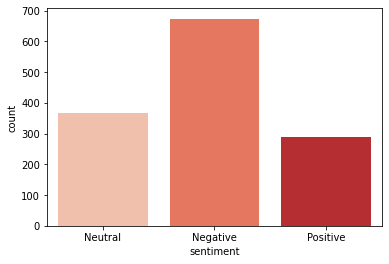

In [23]:
import seaborn as sns
sns.countplot(x='sentiment', data=df, palette="Reds")

We can see that there are more news with Negative sentiment. 

### Check correlation between the followers and polarity scores

In [24]:
df['polarity_score'].corr(df['author_followers'])

0.053717506122658056

<AxesSubplot:xlabel='author_followers', ylabel='polarity_score'>

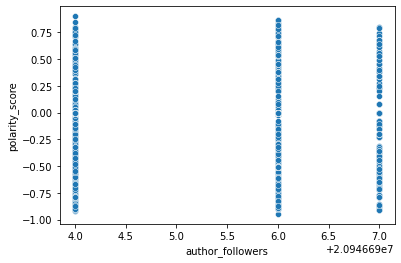

In [25]:
sns.scatterplot(data=df, x="author_followers", y="polarity_score")

As we can see, correlation is very low. Partially the reason is that there is no variability in the followers number. For such a short period, the number of followers increased and decreased several times by 1-2 followers.

## NYTimes data

In [26]:
df2['polarity_score'] = df2['text'].apply(lambda x: sentiment.polarity_scores(str(x))['compound'])
df2['sentiment'] = np.where(df2['polarity_score']>0.05, "Positive", 
                          np.where(df2['polarity_score']< -0.05, "Negative", 'Neutral'))

<AxesSubplot:xlabel='sentiment', ylabel='count'>

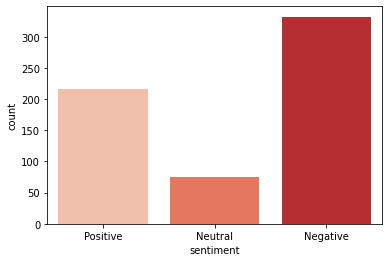

In [27]:
import seaborn as sns
sns.countplot(x='sentiment', data=df2, palette="Reds")

We can see that there are more news with Negative sentiment. 

### Check correlation between the followers and polarity scores

In [28]:
df2['polarity_score'].corr(df2['author_followers'])

-0.038558693958326055

<AxesSubplot:xlabel='author_followers', ylabel='polarity_score'>

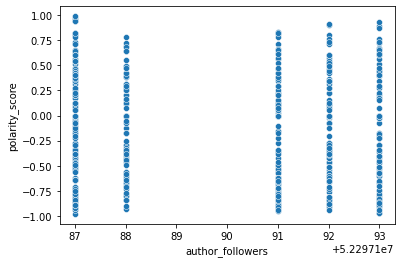

In [29]:
sns.scatterplot(data=df2, x="author_followers", y="polarity_score")

As we can see, correlation is very low. Partially the reason is that there is no variability in the followers number. For such a short period, the number of followers increased and decreased several times by 1-2 followers.

In [30]:
df1 = df 

# What are the most frequent topics tweeted about by each outlet? Are there differences in outlets?

# Preprocess data

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, LancasterStemmer 

In [220]:
# load the stopword list provided by the NLTK library
stop_words = stopwords.words('english')

# think of twitter/news specific stopwords
stopwords_verbs = ['say', 'said', 'writes', 'take','get','may','say', 'get', 'go', 'know', 'may', 'need', 'like', 'make', 'see', 'want', 'come', 'take', 'use', 'would', 'can']
stopwords_other = ['according', 'one', 'mr', 'bbc', 'image', 'getty', 'de', 'en', 'caption', 'also', 'copyright', 'something', 'u']

stop_words = stop_words + stopwords_verbs + stopwords_other

Let's define a function **preprocessing_text** that takes text as input an does the following:
* replaces all non-alphanumeric characters with spaces
* replaces 3+ consecutive letters to one. e.g. looooove -> love
* removes all emails
* removes all urls
* replaces all letters to lower case
* removes stopwords (nltk stopwords)
* removes words with digits
* conducts a lemmatization

In [33]:
def preprocessing_text(text):
    text = re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", text) # remove emails
    text = re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , text) # remove urls
    text = re.sub(r'[^A-Za-z0-9 ]+', ' ', text) #remove all non‐alphanumeric characters except white space
    text = re.sub("(.)\\1{2,}", "\\1", text) #replace 3+ consecutive letters to 1 (loooovvvve -> love)
    words = word_tokenize(text.lower())
    tokens = [word for word in words if word not in stop_words]
    tokens = [token for token in tokens if not any(c.isdigit() for c in token)] #remove everything containing digits
    lemmatizer = WordNetLemmatizer()
    tokens_lematized = [lemmatizer.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens_lematized)
    return preprocessed_text

In [34]:
%%time
df1['text'] = df1['text'].apply(lambda x: preprocessing_text(x))

Wall time: 2.47 s


In [35]:
%%time
df2['text'] = df2['text'].apply(lambda x: preprocessing_text(x))

Wall time: 401 ms


## Use count vectorizer

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer1 = CountVectorizer()
vectorizer2 = CountVectorizer()

count1 = vectorizer1.fit_transform(df1.text)
count2 = vectorizer2.fit_transform(df2.text)

Let's first have a look at the top common words mentioned by senators in their speeches.

In [37]:
df1_top_words = pd.DataFrame(count1.toarray().transpose(), index=vectorizer1.get_feature_names())

#Creating a column that would show the total number of mentions for each of the word/token
df1_top_words.loc[:,'Total'] = df1_top_words.sum(axis=1) 
df1_top_words = df1_top_words.sort_values(by='Total', ascending=False)
df1_top_words.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1320,1321,1322,1323,1324,1325,1326,1327,1328,Total
ukraine,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,1,0,1,0,263
biden,1,1,0,1,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,0,206
russia,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,184
war,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,141
russian,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,140
say,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,133
putin,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,98
ukrainian,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,67
zelenskyy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,67
new,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,64


In [38]:
df2_top_words = pd.DataFrame(count2.toarray().transpose(), index=vectorizer2.get_feature_names())

#Creating a column that would show the total number of mentions for each of the word/token
df2_top_words.loc[:,'Total'] = df2_top_words.sum(axis=1) 
df2_top_words = df2_top_words.sort_values(by='Total', ascending=False)
df2_top_words.head(10)

,0,1,2,3,4,5,6,7,8,9,...,614,615,616,617,618,619,620,621,622,Total
ukraine,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,179
russia,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,134
russian,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,117
new,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,85
war,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,83
president,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,79
city,2,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,70
year,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,67
ukrainian,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,63
people,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,62


Above we can see the common words for two of the news outlets. We can observe that almost 20% of tweets included the words related to Russia-Ukraine conflict (for both outlets).

Let's now perform LDA and see whether there are other topics as well.

First prepare text for LDA. Transform each tweet to a list of words:

In [39]:
from nltk.tokenize import RegexpTokenizer
import re
tokenizer = RegexpTokenizer(r'\w+')

def prepare_text_for_lda(text):
    text= re.sub(r'\d', '', text)
    tokens = tokenizer.tokenize(text.lower())
    return tokens

In [40]:
df1['tokens'] = df1['text'].apply(lambda x: prepare_text_for_lda(x))
df2['tokens'] = df2['text'].apply(lambda x: prepare_text_for_lda(x))

Second, create dictionary and corpus. Separately for two news outlets of course

In [41]:
from gensim import corpora

dictionary_LDA1 = corpora.Dictionary(df1['tokens'].tolist())
dictionary_LDA2 = corpora.Dictionary(df2['tokens'].tolist())

corpus1 = [dictionary_LDA1.doc2bow(tok) for tok in df1['tokens'].tolist()]
corpus2 = [dictionary_LDA2.doc2bow(tok) for tok in df2['tokens'].tolist()]

Third, let's look on topics.

We assume that there might be up to **ten** topics: Politics, Business, Tech, Science, Health, Sports, Arts, Style, Showbiz. 

Maybe we can even shorten the number of topics to **five**: Politics, Business, Entertainment, Sports, Lifestyle.

Let's see how LDA performs for both outlets:

### Foxnews, 10 topics

In [42]:
from gensim import models

num_topics = 10
lda_model1 = models.LdaModel(corpus1, num_topics=num_topics,
                            random_state=100,
                            id2word=dictionary_LDA1, 
                            passes=4)

In [43]:
for i,topic in lda_model1.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic + "\n")


0: 0.014*"russia" + 0.010*"say" + 0.008*"jussie" + 0.008*"smollett" + 0.008*"u" + 0.007*"actor" + 0.007*"house" + 0.007*"kim" + 0.007*"ukraine" + 0.006*"russian" + 0.005*"war" + 0.005*"nuclear" + 0.005*"white" + 0.005*"official" + 0.005*"covid" + 0.005*"tell" + 0.005*"plan" + 0.005*"report" + 0.005*"sentencing" + 0.005*"davidson"

1: 0.026*"biden" + 0.016*"say" + 0.015*"russia" + 0.012*"ukraine" + 0.011*"russian" + 0.009*"war" + 0.008*"time" + 0.007*"u" + 0.007*"energy" + 0.006*"amid" + 0.006*"new" + 0.006*"zelenskyy" + 0.006*"iran" + 0.005*"call" + 0.005*"york" + 0.005*"chief" + 0.005*"admin" + 0.004*"home" + 0.004*"talk" + 0.004*"nato"

2: 0.020*"u" + 0.010*"putin" + 0.010*"zelenskyy" + 0.009*"ukraine" + 0.009*"say" + 0.008*"russia" + 0.006*"president" + 0.006*"school" + 0.006*"fight" + 0.005*"biden" + 0.005*"crime" + 0.004*"house" + 0.004*"time" + 0.004*"woman" + 0.004*"break" + 0.004*"police" + 0.004*"threat" + 0.004*"war" + 0.003*"expert" + 0.003*"state"

3: 0.018*"biden" + 0.018*

### Foxnews, 5 topics

In [44]:
num_topics = 5
lda_model1 = models.LdaModel(corpus1, num_topics=num_topics,
                            random_state=100,
                            id2word=dictionary_LDA1, 
                            passes=4)

In [45]:
for i,topic in lda_model1.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic + "\n")

0: 0.016*"russia" + 0.010*"say" + 0.007*"ukraine" + 0.007*"jussie" + 0.007*"smollett" + 0.006*"biden" + 0.005*"u" + 0.005*"house" + 0.005*"russian" + 0.005*"war" + 0.004*"official" + 0.004*"report" + 0.004*"covid" + 0.004*"white" + 0.004*"kim" + 0.004*"tell" + 0.004*"jail" + 0.003*"people" + 0.003*"ahead" + 0.003*"plan"

1: 0.023*"biden" + 0.015*"ukraine" + 0.012*"russia" + 0.011*"say" + 0.008*"war" + 0.006*"new" + 0.006*"amid" + 0.006*"zelenskyy" + 0.006*"call" + 0.005*"energy" + 0.005*"ukrainian" + 0.005*"time" + 0.005*"russian" + 0.005*"u" + 0.004*"american" + 0.004*"former" + 0.004*"cnn" + 0.004*"putin" + 0.003*"york" + 0.003*"trump"

2: 0.018*"ukraine" + 0.012*"russia" + 0.011*"u" + 0.010*"zelenskyy" + 0.009*"biden" + 0.008*"putin" + 0.006*"president" + 0.006*"war" + 0.006*"say" + 0.006*"congress" + 0.005*"expert" + 0.004*"call" + 0.004*"energy" + 0.004*"address" + 0.004*"fight" + 0.004*"opinion" + 0.003*"threat" + 0.003*"nyc" + 0.003*"ukrainian" + 0.003*"break"

3: 0.016*"biden" 

For FoxNews, it doesn't seem that LDA is performing a good jon. Every topic has words related to Russia-Ukraine conflict.

Probably we will delete the most popular words and then perform analysis one more time

Now, let's look on NYTimes:

### NYTimes, 10 topics

In [46]:
num_topics = 10
lda_model2 = models.LdaModel(corpus2, num_topics=num_topics,
                            random_state=100,
                            id2word=dictionary_LDA2, 
                            passes=4)

In [47]:
for i,topic in lda_model2.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic + "\n")

0: 0.012*"new" + 0.009*"ukraine" + 0.008*"two" + 0.008*"city" + 0.007*"russian" + 0.007*"york" + 0.006*"people" + 0.006*"war" + 0.006*"russia" + 0.005*"time" + 0.004*"channel" + 0.004*"president" + 0.004*"men" + 0.004*"year" + 0.004*"since" + 0.003*"kyiv" + 0.003*"breaking" + 0.003*"world" + 0.003*"covid" + 0.003*"wednesday"

1: 0.009*"ukraine" + 0.008*"city" + 0.008*"ukrainian" + 0.006*"day" + 0.005*"company" + 0.005*"new" + 0.005*"news" + 0.004*"war" + 0.004*"russian" + 0.004*"journalist" + 0.004*"month" + 0.004*"force" + 0.004*"next" + 0.004*"monday" + 0.004*"opinion" + 0.003*"every" + 0.003*"resident" + 0.003*"end" + 0.003*"state" + 0.003*"kyiv"

2: 0.011*"city" + 0.010*"russian" + 0.009*"ukraine" + 0.006*"year" + 0.005*"new" + 0.005*"war" + 0.005*"two" + 0.004*"killed" + 0.004*"ukrainian" + 0.004*"least" + 0.004*"woman" + 0.004*"kyiv" + 0.004*"even" + 0.004*"death" + 0.004*"number" + 0.004*"state" + 0.004*"people" + 0.004*"york" + 0.004*"anna" + 0.003*"show"

3: 0.008*"russian" + 

### NYTimes, 5 topics

In [48]:
num_topics = 5
lda_model2 = models.LdaModel(corpus2, num_topics=num_topics,
                            random_state=100,
                            id2word=dictionary_LDA2, 
                            passes=4)

In [49]:
for i,topic in lda_model2.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic + "\n")

0: 0.011*"president" + 0.010*"new" + 0.009*"ukraine" + 0.008*"russian" + 0.007*"russia" + 0.006*"city" + 0.006*"biden" + 0.006*"people" + 0.006*"world" + 0.005*"two" + 0.005*"war" + 0.005*"news" + 0.004*"york" + 0.004*"time" + 0.004*"state" + 0.004*"breaking" + 0.004*"wednesday" + 0.004*"zelensky" + 0.003*"country" + 0.003*"covid"

1: 0.012*"ukraine" + 0.006*"ukrainian" + 0.006*"war" + 0.006*"russia" + 0.006*"people" + 0.005*"russian" + 0.005*"country" + 0.004*"new" + 0.004*"city" + 0.004*"monday" + 0.004*"day" + 0.003*"news" + 0.003*"invasion" + 0.003*"two" + 0.003*"year" + 0.003*"un" + 0.003*"attack" + 0.003*"time" + 0.003*"company" + 0.003*"fleeing"

2: 0.013*"ukraine" + 0.010*"russian" + 0.008*"city" + 0.007*"year" + 0.006*"war" + 0.005*"ukrainian" + 0.005*"new" + 0.004*"day" + 0.004*"russia" + 0.004*"people" + 0.004*"kyiv" + 0.004*"president" + 0.004*"two" + 0.004*"killed" + 0.003*"could" + 0.003*"least" + 0.003*"american" + 0.003*"york" + 0.003*"show" + 0.003*"died"

3: 0.008*"ru

The situation is similar to Fox News. However, there is one topic about coronavirus for sure.

To improve the situation, let's get rid of top words by each outlet. 

## LDA without common words

In [50]:
# Creating 'stop word' list of common words 
common_words1 = df1_top_words.index.values[:].tolist()[0:10]
common_words2 = df2_top_words.index.values[:].tolist()[0:10]

In [51]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

def get_lemma(element):
    for word, pos in pos_tag(element.split()):
        result_pos=wordnet_pos(pos)
        if result_pos != None:
            return WordNetLemmatizer().lemmatize(word, result_pos)
        else:
            return word

# original example can be found here https://stackoverflow.com/a/15590384
def wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
        
def remove_common_words(list_element, common_words):
    tokens = [get_lemma(token) for token in list_element]
    tokens = [token for token in tokens if token not in common_words]
    tokens = [token for token in tokens if len(token) > 2]
    return tokens

In [52]:
df1['tokens'] = df1['tokens'].apply(lambda sentences: remove_common_words(sentences, common_words1))
df2['tokens'] = df2['tokens'].apply(lambda sentences: remove_common_words(sentences, common_words2))

In [53]:
dictionary_LDA1 = corpora.Dictionary(df1['tokens'].tolist())
dictionary_LDA2 = corpora.Dictionary(df2['tokens'].tolist())

corpus1 = [dictionary_LDA1.doc2bow(tok) for tok in df1['tokens'].tolist()]
corpus2 = [dictionary_LDA2.doc2bow(tok) for tok in df2['tokens'].tolist()]

### Foxnews

In [54]:
num_topics = 10
lda_model1 = models.LdaModel(corpus1, num_topics=num_topics,
                            random_state=100,
                            id2word=dictionary_LDA1, 
                            passes=4)

In [55]:
for i,topic in lda_model1.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic + "\n")


0: 0.009*"amid" + 0.007*"get" + 0.007*"price" + 0.007*"gas" + 0.007*"call" + 0.006*"covid" + 0.006*"high" + 0.006*"kyiv" + 0.006*"make" + 0.006*"give" + 0.005*"congress" + 0.005*"kim" + 0.005*"opinion" + 0.005*"blame" + 0.005*"american" + 0.005*"official" + 0.005*"fight" + 0.005*"police" + 0.005*"political" + 0.004*"china"

1: 0.009*"release" + 0.008*"nyc" + 0.008*"official" + 0.006*"suspect" + 0.005*"show" + 0.005*"crime" + 0.005*"old" + 0.004*"rule" + 0.004*"baldwin" + 0.004*"star" + 0.004*"homeless" + 0.004*"arrest" + 0.004*"medium" + 0.004*"message" + 0.004*"issue" + 0.004*"amid" + 0.004*"mayor" + 0.004*"sanction" + 0.004*"invasion" + 0.004*"foreign"

2: 0.009*"kill" + 0.008*"time" + 0.007*"covid" + 0.006*"people" + 0.006*"since" + 0.005*"former" + 0.005*"journalist" + 0.005*"price" + 0.005*"sell" + 0.005*"york" + 0.005*"year" + 0.005*"republican" + 0.005*"city" + 0.005*"gas" + 0.005*"contributor" + 0.004*"official" + 0.004*"kyiv" + 0.004*"warns" + 0.004*"nuclear" + 0.004*"issue"



In [56]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(topic_model=lda_model1, corpus=corpus1, dictionary=dictionary_LDA1)
pyLDAvis.display(vis)

C:\Users\77774\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


The graph above suggests that there are 6 topics, let's try doing six topics and decide whether they make sense

In [57]:
num_topics = 6
lda_model1 = models.LdaModel(corpus1, num_topics=num_topics,
                            random_state=100,
                            id2word=dictionary_LDA1, 
                            passes=4)

for i,topic in lda_model1.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic + "\n")

0: 0.008*"get" + 0.008*"fight" + 0.006*"blame" + 0.006*"kyiv" + 0.006*"gas" + 0.006*"high" + 0.006*"price" + 0.006*"state" + 0.005*"amid" + 0.005*"president" + 0.005*"american" + 0.005*"make" + 0.004*"view" + 0.004*"covid" + 0.004*"invasion" + 0.004*"force" + 0.003*"congress" + 0.003*"follow" + 0.003*"military" + 0.003*"close"

1: 0.007*"sanction" + 0.006*"amid" + 0.006*"official" + 0.005*"crime" + 0.005*"release" + 0.005*"show" + 0.004*"energy" + 0.004*"leader" + 0.004*"police" + 0.004*"york" + 0.004*"nyc" + 0.003*"hit" + 0.003*"city" + 0.003*"play" + 0.003*"rule" + 0.003*"charge" + 0.003*"world" + 0.003*"gop" + 0.003*"medium" + 0.003*"pay"

2: 0.008*"price" + 0.007*"gas" + 0.005*"covid" + 0.005*"report" + 0.004*"gop" + 0.004*"call" + 0.004*"warns" + 0.004*"official" + 0.004*"amid" + 0.004*"time" + 0.004*"tax" + 0.004*"western" + 0.004*"back" + 0.003*"leader" + 0.003*"world" + 0.003*"slam" + 0.003*"people" + 0.003*"former" + 0.003*"home" + 0.003*"woman"

3: 0.009*"call" + 0.005*"trump

For FoxNews, it doesn't seem that LDA is performing a good jon. Every topic has words related to Russia-Ukraine conflict.

Probably we will delete the most popular words and then perform analysis one more time

Now, let's look on NYTimes:

Let's some up topics:
1. American economy
2. Crime at museum
3. Oil, gas, and sanctions
4. Covid situation
5. Russian-Ukrainian conflict
6. Jussie Smollet case

### NYTimes, 10 topics

In [58]:
num_topics = 10
lda_model2 = models.LdaModel(corpus2, num_topics=num_topics,
                            random_state=100,
                            id2word=dictionary_LDA2, 
                            passes=4)

In [59]:
for i,topic in lda_model2.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic + "\n")

0: 0.007*"official" + 0.007*"zelensky" + 0.006*"volodymyr" + 0.005*"congress" + 0.005*"white" + 0.005*"invasion" + 0.005*"address" + 0.005*"state" + 0.005*"house" + 0.005*"defense" + 0.004*"two" + 0.004*"day" + 0.004*"sunday" + 0.004*"security" + 0.004*"wednesday" + 0.004*"show" + 0.003*"sanction" + 0.003*"home" + 0.003*"test" + 0.003*"role"

1: 0.012*"two" + 0.010*"news" + 0.008*"world" + 0.007*"york" + 0.006*"break" + 0.005*"shot" + 0.005*"injured" + 0.005*"come" + 0.005*"large" + 0.005*"woman" + 0.005*"men" + 0.005*"police" + 0.004*"old" + 0.004*"analysis" + 0.004*"doug" + 0.004*"far" + 0.004*"country" + 0.004*"five" + 0.004*"believe" + 0.004*"pandemic"

2: 0.009*"kill" + 0.006*"country" + 0.006*"kyiv" + 0.006*"force" + 0.006*"zelensky" + 0.006*"military" + 0.005*"two" + 0.005*"invasion" + 0.005*"time" + 0.005*"least" + 0.005*"volodymyr" + 0.005*"flee" + 0.005*"show" + 0.005*"york" + 0.004*"day" + 0.004*"since" + 0.004*"die" + 0.004*"civilian" + 0.004*"make" + 0.004*"building"

3: 0

In [60]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(topic_model=lda_model2, corpus=corpus2, dictionary=dictionary_LDA2)
pyLDAvis.display(vis)

C:\Users\77774\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


The graph above suggests that there are 4 topics, let's try doing six topics and decide whether they make sense

In [61]:
num_topics = 4
lda_model2 = models.LdaModel(corpus2, num_topics=num_topics,
                            random_state=100,
                            id2word=dictionary_LDA2, 
                            passes=4)
for i,topic in lda_model2.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic + "\n")

0: 0.005*"official" + 0.004*"state" + 0.004*"two" + 0.004*"show" + 0.004*"test" + 0.004*"sanction" + 0.003*"week" + 0.003*"court" + 0.003*"day" + 0.003*"kill" + 0.003*"force" + 0.003*"woman" + 0.003*"sunday" + 0.003*"attack" + 0.003*"invasion" + 0.003*"last" + 0.003*"country" + 0.003*"house" + 0.003*"coronavirus" + 0.003*"least"

1: 0.007*"two" + 0.007*"world" + 0.005*"news" + 0.005*"country" + 0.005*"china" + 0.005*"biden" + 0.004*"york" + 0.004*"day" + 0.004*"break" + 0.004*"state" + 0.003*"men" + 0.003*"kill" + 0.003*"american" + 0.003*"since" + 0.003*"shot" + 0.003*"pandemic" + 0.003*"around" + 0.003*"washington" + 0.003*"begin" + 0.002*"die"

2: 0.006*"country" + 0.006*"invasion" + 0.005*"kill" + 0.005*"time" + 0.005*"zelensky" + 0.005*"kyiv" + 0.004*"tuesday" + 0.004*"volodymyr" + 0.004*"could" + 0.004*"attack" + 0.004*"military" + 0.004*"two" + 0.004*"since" + 0.004*"flee" + 0.004*"help" + 0.004*"official" + 0.004*"biden" + 0.004*"day" + 0.003*"million" + 0.003*"york"

3: 0.004*

Let's some up topics:
1. Museum attack
2. US-China relations
3. Russian-Ukrainian conflict
4. Covid situation


# Do the usual word analogies hold in this sample?

In [226]:
# concat two dataframes
df = df1.append(df2, ignore_index=True)

C:\Users\77774\AppData\Local\Temp/ipykernel_408/2915173996.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2, ignore_index=True)


In [227]:
# prepare text for Word2Vec
df['text'] = df['text'].apply(lambda x: preprocessing_text(x))
df['tokens'] = df['text'].apply(lambda x: prepare_text_for_lda(x))
df['tokens'] = df['tokens'].apply(lambda sentences: remove_common_words(sentences, []))
texts = df.tokens.tolist()

In [225]:
        
def remove_common_words(list_element, common_words):
    tokens = [token for token in list_element]
    tokens = [token for token in tokens if len(token) > 1]
    return tokens

Train our model

In [228]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=texts, vector_size=100, window=5, min_count=1, workers=4)
model.save("word2vec.model")

As we trained our model, let's see the most similar words to the specific word.

For example, let's see the similarities for the words "war"

In [234]:
model.wv.most_similar('war', topn=10)

[('russian', 0.9077486991882324),
 ('ukraine', 0.906528651714325),
 ('russia', 0.8894844651222229),
 ('people', 0.8875257968902588),
 ('ukrainian', 0.88683021068573),
 ('biden', 0.8865713477134705),
 ('new', 0.8841132521629333),
 ('city', 0.8794456720352173),
 ('world', 0.87581467628479),
 ('american', 0.8714572191238403)]

The model also can help answer questions like Moscow is to Russia like Kyiv is to ___. 

We can simply add and subtract vectors to answer the this question! This is because the vectors for those words have a specific relationship in space:
$$\vec{Russia} - \vec{Moscow} = \vec{answer} - \vec{Kyiv} $$
Therefore:
$$\vec{Russia} - \vec{Moscow} + \vec{Kyiv} = \vec{answer} $$

That means that the vectors of words *russia* and *kyiv* should be positive, whereas the vector *moscow* should be negative. Let's try this out:

In [266]:
model.wv.most_similar(positive = ['russia', 'kyiv'], negative = ['moscow'])

[('russian', 0.8052096366882324),
 ('president', 0.7958784103393555),
 ('ukraine', 0.7921366095542908),
 ('year', 0.790225625038147),
 ('ukrainian', 0.7890375852584839),
 ('biden', 0.7827824950218201),
 ('country', 0.7762905955314636),
 ('state', 0.7749342322349548),
 ('covid', 0.771783173084259),
 ('city', 0.7705891132354736)]

We would expect the word *ukraine*, and indeed it is in the top 3 words, but not the top 1.

Let's do similar task, but instead of capitals-countries pairs, let's use countries-presidents pair:

In [267]:
model.wv.most_similar(positive = ['ukraine', 'putin'], negative = ['zelensky'])

[('war', 0.8036282062530518),
 ('russian', 0.8024653792381287),
 ('biden', 0.7987309694290161),
 ('official', 0.7971853017807007),
 ('american', 0.7957220673561096),
 ('new', 0.7956780791282654),
 ('russia', 0.7865713834762573),
 ('country', 0.7826255559921265),
 ('world', 0.7822819948196411),
 ('woman', 0.7813156247138977)]

Unfortunately, the expected word *russia* is 7th, but *russian* is in top 2.

Let's test several pairs for now and draw the vectors on a 2D space using PCA:

In [275]:
# pretty print function
def pp(obj):
    print(pd.DataFrame(obj))
    
def analogy(worda, wordb, wordc):
    result = model.wv.most_similar(negative=[worda], 
                                positive=[wordb, wordc])
    return result[0][0]

# set the first pair
from_first = 'putin'
to_first = 'russia'

# set the list
list_from = ['biden', 'zelensky', 'johnson', 'macron', 'jinping']

list_to = [analogy(from_first, to_first, x) for x in list_from]
pp(zip(list_from,list_to))

          0          1
0     biden    russian
1  zelensky       kyiv
2   johnson      still
3    macron  narrative
4   jinping  traveling


In this example, I would expect to see the countries of the leaders from the *list_from*. Unfortunately, only Zelensky - Kyiv seems to be related. Let's depict those pairs on a graph

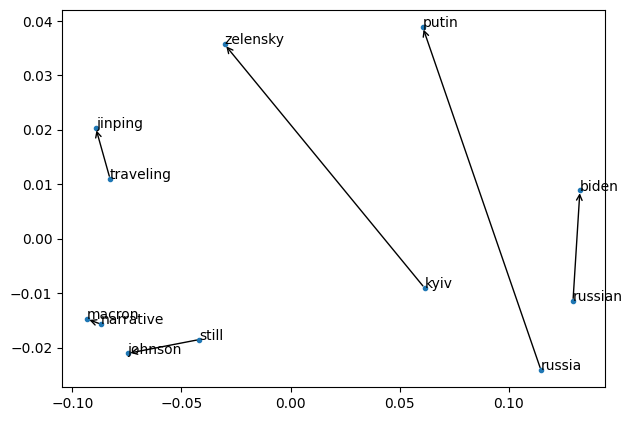

In [276]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def plot_data(orig_data, labels):
    pca = PCA(n_components=2)
    data = pca.fit_transform(orig_data)
    plt.figure(figsize=(7, 5), dpi=100)
    plt.plot(data[:,0], data[:,1], '.')
    for i in range(len(data)):
        plt.annotate(labels[i], xy = data[i])
    for i in range(len(data)//2):
        plt.annotate("",
                xy=data[i],
                xytext=data[i+len(data)//2],
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3")
        )

list_from.append(from_first)
list_to.append(to_first)

labels = list_from + list_to
data = [model.wv[w] for w in labels]
plot_data(data, labels)

Indeed, only Zelensky - Kyiv is similar to Putin - Russia pair.
 
Let's consider an example not related to news. We will use the most famous pairs in word analogies: **man-woman**

In [283]:
# pretty print function
def pp(obj):
    print(pd.DataFrame(obj))
    
def analogy(worda, wordb, wordc):
    result = model.wv.most_similar(negative=[worda], 
                                positive=[wordb, wordc])
    return result[0][0]

# set the first pair
from_first = 'man'
to_first = 'woman'

# set the list
list_from = ['king', 'gentleman', 'husband', 'boy']

list_to = [analogy(from_first, to_first, x) for x in list_from]
pp(zip(list_from,list_to))

           0       1
0       king  season
1  gentleman   eaten
2    husband    fuel
3        boy    case


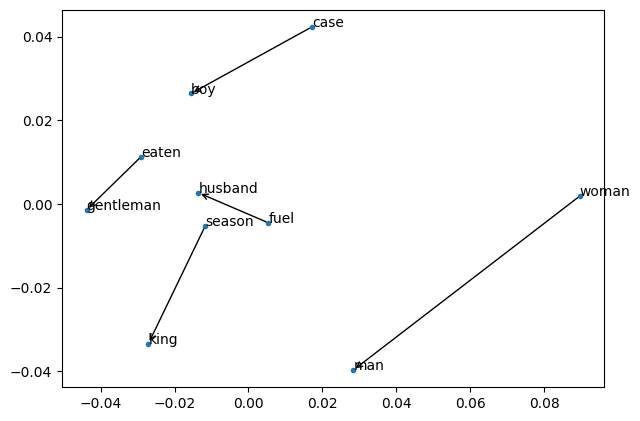

In [282]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def plot_data(orig_data, labels):
    pca = PCA(n_components=2)
    data = pca.fit_transform(orig_data)
    plt.figure(figsize=(7, 5), dpi=100)
    plt.plot(data[:,0], data[:,1], '.')
    for i in range(len(data)):
        plt.annotate(labels[i], xy = data[i])
    for i in range(len(data)//2):
        plt.annotate("",
                xy=data[i],
                xytext=data[i+len(data)//2],
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3")
        )

list_from.append(from_first)
list_to.append(to_first)

labels = list_from + list_to
data = [model.wv[w] for w in labels]
plot_data(data, labels)

Given that the sample size is small, the word analogies don't hold. Especially, if we are looking on the words not used in news texts much (like Putin - Russia, Zelensky - Ukraine).

# Create the most representative tweet by outlet

In [199]:
vectorizer = CountVectorizer()

count = vectorizer.fit_transform(df.text)

In [200]:
count = pd.DataFrame(count.toarray())

In [201]:
#count.join(df.text)

In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(count, df['is_nyt'], test_size=0.3, random_state=1, stratify = df['is_nyt'])

In [203]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import classification_report

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
predictions = linear_regressor.predict(X_test)


In [204]:
X_test['predictions'] = predictions

In [205]:
X_test.sort_values(by=['predictions'])

,0,1,2,3,4,5,6,7,8,9,...,5754,5755,5756,5757,5758,5759,5760,5761,5762,predictions
814,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.42
583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.37
788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.97
781,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,-0.74
174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,2.04
1941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.06
1540,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2.11
1875,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.40


We can see that minimum has index 814 and maximum has index of 1775. Let's take the texts of those rows

The most representative tweet by FoxNews

In [304]:
df.text.iloc[[814]].tolist()[0]

'opinion stop biden war oil gas fight putin making europe energy independent'

The most representative tweet by NY Times

In [305]:
df.text.iloc[[1775]].tolist()[0]

'kyiv hit heavy artillery strike day heavy fighting suburb projectile struck apartment building blowing window causing fire least two people died local authority follow update'

# Bonus predict polarity score

In [218]:
df1 = pd.read_csv('Inputs/FoxNews_all_tweets.csv')
df2 = pd.read_csv('Inputs/nytimes_all_tweets.csv')

# merging two datasets 
frames = [df1, df2]
df = pd.concat(frames, ignore_index= True)

In [219]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [226]:
# estimating polarity score for each tweet
df['polarity_score'] = df['text'].apply(lambda x: sentiment.polarity_scores(str(x))['compound'])

# classifying tweets as positive, negative and neutral based on common thresholds for splitting Vader sentiments
df['sentiment'] = np.where(df['polarity_score']>0.05, 1, 
                          np.where(df['polarity_score']< -0.05, -1, 0))

In [221]:
%%time
df['text'] = df['text'].apply(lambda x: preprocessing_text(x))

Wall time: 930 ms


In [231]:
vectorizer = CountVectorizer()
count = vectorizer.fit_transform(df.text)

In [232]:
count = pd.DataFrame(count.toarray())

In [233]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(count, df['sentiment'], test_size=0.3, random_state=1, stratify = df['sentiment'] )

In [234]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

logistic_regressor =  LogisticRegression(multi_class='multinomial', solver='lbfgs')
logistic_regressor.fit(X_train, y_train)
predictions = logistic_regressor.predict(X_test)


In [235]:
print(classification_report(y_test,  predictions))

              precision    recall  f1-score   support

          -1       0.78      0.90      0.83       308
           0       0.60      0.62      0.61       125
           1       0.76      0.50      0.61       153

    accuracy                           0.74       586
   macro avg       0.71      0.67      0.68       586
weighted avg       0.74      0.74      0.73       586



In [236]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[277  19  12]
 [ 36  77  12]
 [ 44  32  77]]


As we can see, it is not easy to predict the sentiment given the text of a tweet